In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as linalg
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

Question 1

In [ ]:
v1 = np.array([1,6,7,9])
v2 = np.array([1,0,6,9])

print("Number of equal values in the vectors v1 and v2 is", np.sum(v1==v2))

Number of equal values in the vectors v1 and v2 is 2


Question 2

In [ ]:
M = (np.random.rand(10,3)*100).astype(int)
print("Matrix M:\n",M)
print("Shape of M:\n",M.shape)
print("No of rows of M:\n",M.shape[0])
print("No of columns of M:\n",M.shape[1])

for i in range(0,10):
  if (M[i][0]+M[i][1])%4==0:
    M[i][2] = 1
  else:
    M[i][2] = 0
print("Matrix M:\n",M)

Matrix M:
 [[86  0 31]
 [14 73 60]
 [45 35 54]
 [64 90 75]
 [37 65 77]
 [45  4 50]
 [27 51 56]
 [90 36 32]
 [21 82 33]
 [85 49 16]]
Shape of M:
 (10, 3)
No of rows of M:
 10
No of columns of M:
 3
Matrix M:
 [[86  0  0]
 [14 73  0]
 [45 35  1]
 [64 90  0]
 [37 65  0]
 [45  4  0]
 [27 51  0]
 [90 36  0]
 [21 82  0]
 [85 49  0]]


Question 3

In [ ]:
df = pd.DataFrame(M)
df.columns = ['X1','X2','Y']

In [ ]:
df.head()

,X1,X2,Y
0,86,0,0
1,14,73,0
2,45,35,1
3,64,90,0
4,37,65,0


Question 4

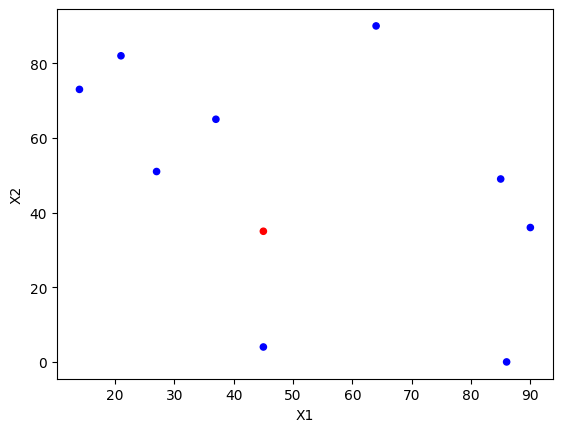

In [ ]:
col = df.Y.map({0:'b',1:'r'})
df.plot.scatter(x='X1',y='X2',c=col)
plt.show()

Question 5

In [ ]:
SE = (np.square(df['X1']-df['X2']))
sum = np.sum(SE)
print(f"The Squared Error is\n{SE}\nThe sum of Sqaured Errors is {sum}")

The Squared Error is
0    7396
1    3481
2     100
3     676
4     784
5    1681
6     576
7    2916
8    3721
9    1296
dtype: int64
The sum of Sqaured Errors is 22627


Question 6

In [ ]:
a = np.array(df['X1'])
b = np.array(df['X2'])

EucDist = np.sum(np.sqrt(SE))
EucDist_linalg = linalg.norm(a-b, axis=0)
print(f"The Euclidean Distances is {EucDist}")
print(f"The Euclidean Distances via linalg are {EucDist_linalg}")

The Euclidean Distances is 425.0
The Euclidean Distances via linalg are 150.42273764295078


Question 7

In [ ]:
V = np.random.rand(3)
distances = np.linalg.norm(M - V, axis=1)

print("Vector V:", V)
print("Matrix M:\n", M)
print("Euclidean distances between each row of M and V:\n", distances)


Vector V: [0.53800278 0.43441627 0.42470917]
Matrix M:
 [[86  0  0]
 [14 73  0]
 [45 35  1]
 [64 90  0]
 [37 65  0]
 [45  4  0]
 [27 51  0]
 [90 36  0]
 [21 82  0]
 [85 49  0]]
Euclidean distances between each row of M and V:
 [ 85.4641566   73.80494352  56.32033145 109.77066665  74.15100957
  44.60675915  57.07272494  96.27325729  84.09410298  97.43010456]


Question 8

In [ ]:
A = np.random.rand(10, 2)

print("Original matrix A:")
print(A)
C = np.random.rand(10)
A = np.column_stack((A, C))

print("Matrix A after adding new column:")
print(A)

R = np.random.rand(1, 3)
A = np.vstack((A, R))

print("Matrix A after adding new row:")
print(A)


Original matrix A:
[[4.35185578e-01 6.03434028e-01]
 [3.65570250e-01 7.09818097e-02]
 [3.24888089e-01 7.65688396e-04]
 [7.85882645e-01 3.31061563e-01]
 [4.02894191e-01 6.73131818e-01]
 [8.20087271e-01 4.28134371e-01]
 [4.91568228e-01 3.02692470e-02]
 [7.78387683e-01 8.91207818e-02]
 [3.82076013e-01 6.96628674e-01]
 [5.75133816e-01 5.92810489e-01]]
Matrix A after adding new column:
[[4.35185578e-01 6.03434028e-01 8.02294125e-01]
 [3.65570250e-01 7.09818097e-02 3.03650746e-01]
 [3.24888089e-01 7.65688396e-04 9.31948724e-01]
 [7.85882645e-01 3.31061563e-01 4.36464430e-01]
 [4.02894191e-01 6.73131818e-01 3.43358808e-01]
 [8.20087271e-01 4.28134371e-01 8.90831485e-01]
 [4.91568228e-01 3.02692470e-02 9.02134439e-01]
 [7.78387683e-01 8.91207818e-02 1.42910366e-01]
 [3.82076013e-01 6.96628674e-01 2.97623244e-01]
 [5.75133816e-01 5.92810489e-01 2.58123616e-01]]
Matrix A after adding new row:
[[4.35185578e-01 6.03434028e-01 8.02294125e-01]
 [3.65570250e-01 7.09818097e-02 3.03650746e-01]
 [3.2488

Questio 9

In [ ]:
M_prime = np.random.rand(M.shape[0], 3)
distances = [[] * M_prime.shape[0] for i in range(M.shape[0])]
for i in range(M.shape[0]):
    for j in range(M_prime.shape[0]):
        distances[i].append(np.linalg.norm(M[i] - M_prime[j]))

Dist = np.array(distances)
Dist

array([[ 85.98563202,  85.26138216,  85.66192269,  85.37617062,
         85.11013252,  85.16516391,  85.97571871,  85.09097269,
         85.42667066,  85.88766126],
       [ 73.51735347,  73.29578469,  73.65728732,  74.16241349,
         73.53121885,  73.1959931 ,  73.91344533,  73.54887679,
         73.30619763,  73.90834878],
       [ 56.49066316,  55.86894569,  56.36132831,  56.48512042,
         55.91537368,  55.73263152,  56.73501162,  55.90789078,
         55.98632646,  56.66394726],
       [109.75280793, 109.26056007, 109.7320628 , 110.03036471,
        109.39206524, 109.13490218, 110.07865725, 109.39806193,
        109.33987512, 110.03497201],
       [ 74.0681474 ,  73.63203329,  74.0853181 ,  74.43917159,
         73.79116907,  73.51099695,  74.41591327,  73.8003538 ,
         73.69607876,  74.38168722],
       [ 45.09523354,  44.3640889 ,  44.78826844,  44.55230594,
         44.23499468,  44.26306732,  45.1175191 ,  44.21837934,
         44.52750378,  45.03356191],
       [ 5

Question 10

In [ ]:
sorted_dist = Dist[Dist[:, -1].argsort()]
print(sorted_dist)

[[ 45.09523354  44.3640889   44.78826844  44.55230594  44.23499468
   44.26306732  45.1175191   44.21837934  44.52750378  45.03356191]
 [ 56.49066316  55.86894569  56.36132831  56.48512042  55.91537368
   55.73263152  56.73501162  55.90789078  55.98632646  56.66394726]
 [ 56.97046097  56.5518666   56.99880019  57.36928064  56.71936295
   56.43299995  57.32378244  56.7297361   56.61106723  57.2932782 ]
 [ 73.51735347  73.29578469  73.65728732  74.16241349  73.53121885
   73.1959931   73.91344533  73.54887679  73.30619763  73.90834878]
 [ 74.0681474   73.63203329  74.0853181   74.43917159  73.79116907
   73.51099695  74.41591327  73.8003538   73.69607876  74.38168722]
 [ 83.84296831  83.57886603  83.96088431  84.44122708  83.80161055
   83.47382517  84.23341603  83.8176551   83.59964725  84.22223101]
 [ 85.98563202  85.26138216  85.66192269  85.37617062  85.11013252
   85.16516391  85.97571871  85.09097269  85.42667066  85.88766126]
 [ 96.61195601  95.90523611  96.38718353  96.33340154  

Question 11

In [ ]:
k = 3
initial_k_rows = sorted_dist[:k]
print(initial_k_rows)

[[45.09523354 44.3640889  44.78826844 44.55230594 44.23499468 44.26306732
  45.1175191  44.21837934 44.52750378 45.03356191]
 [56.49066316 55.86894569 56.36132831 56.48512042 55.91537368 55.73263152
  56.73501162 55.90789078 55.98632646 56.66394726]
 [56.97046097 56.5518666  56.99880019 57.36928064 56.71936295 56.43299995
  57.32378244 56.7297361  56.61106723 57.2932782 ]]


Question 12

In [ ]:
labels = initial_k_rows[:, -1]
num_ones = np.sum(labels == 1)
num_zeros = np.sum(labels == 0)

if num_ones > num_zeros:
    print(1)
else:
    print(0)

0


### Part B

In [ ]:
df = pd.read_csv('diabetes_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
std = StandardScaler().fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

In [ ]:
X_test = pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7
0,-0.843418,-0.485551,0.028144,0.471980,0.426464,0.255785,-0.983102,-0.958168
1,0.940252,-0.087066,-3.540037,-1.293913,-0.699714,-0.907852,-0.788100,0.296235
2,-0.248862,1.997320,0.028144,0.093574,0.968698,0.540230,-0.208915,0.212608
3,0.642973,-1.282522,0.537884,0.976521,-0.699714,0.979826,-0.881235,-0.456407
4,0.940252,0.771211,0.333988,-1.293913,-0.699714,0.928109,-0.648397,0.797996


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[97 13]
 [19 25]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.66      0.57      0.61        44

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.79      0.79      0.79       154

